In [ ]:
import hashlib

In [ ]:
class merkle_Node:
    def __init__(self, data,left=None,right=None,parent = None):
        self.data = data
        self.left = left
        self.right = right
        self.parent = parent

    #Niveau dans l'arbre
    def get_level(self):
        level = 0
        p = self.parent
        while p:
            level += 1
            p = p.parent

        return level
    
    #visualisation de l'arbre  
    def print_tree(self):
        spaces = ' ' * self.get_level() * 3
        prefix = '\n'+spaces + "|__" if self.parent else ""
        print(prefix + self.data)
        if self.left:
          self.left.print_tree()
        if self.right:
          self.right.print_tree()


In [ ]:
def adjust(tran):
  if len(tran)%2!=0:
    tran.append(tran[ len(tran)-1])
  return tran

In [ ]:
def goupe_in_2(T_list):
    N_list = []
    for i in range(0, len(T_list), 2):
      N_list.append(T_list[i] + T_list[i+1])
    return N_list

In [ ]:
def builde_merkle_tree(tran: list):
  tran=adjust(tran) #adjustement de la taill

  node_listeLeaf=[]
  node_liste=[]
  #----------les feuilles-----------------
  for data in tran:
    node_listeLeaf.append(merkle_Node(data))
  #1er niveau 
  for i in range(0,len(tran)):
    hash=hashlib.md5(tran[i].encode()).hexdigest()
    node_liste.append(merkle_Node(hash,node_listeLeaf[i]))
    node_listeLeaf[i].parent=node_liste[i]
    

  #le rest de l'arbre 
  while len(node_liste)!=1:
    tmp_liste=[]
    node_liste=adjust(node_liste)
    k=0
    for i in range(0,len(node_liste),2):
      data=node_liste[i].data+node_liste[i+1].data #concatinsation 
      hash=hashlib.md5(data.encode()).hexdigest()  #hasahge 
      tmp_liste.append(merkle_Node(hash,node_liste[i],node_liste[i+1])) #creation de neude
      node_liste[i].parent=tmp_liste[k]
      node_liste[i+1].parent=tmp_liste[k]
      k+=1
    node_liste=tmp_liste
    
  
  return node_liste[0]



In [ ]:
tran=['smail','Mohemmed','sarah']

root_node=builde_merkle_tree(tran)

print(root_node.data)

4dda52c8d7455c6358947e24adb83458


In [ ]:
root_node.print_tree()

4dda52c8d7455c6358947e24adb83458

   |__f9fd0b49daa3fc3a0ac46ea7cadad1eb

      |__703f88e8a711cace13785ed6dbde9177

         |__smail

      |__82bf90ec4fce2fb30d4041078176db70

         |__Mohemmed

   |__fe5d96eca55ed1810246fffa238073a9

      |__9e9d7a08e048e9d604b79460b54969c3

         |__sarah

      |__9e9d7a08e048e9d604b79460b54969c3

         |__sarah


In [ ]:
tran=['smail','Mohemmed','sarah','meriem']

root_node=builde_merkle_tree(tran)

print(root_node.data)

fc1b2bd8d2fce67d21ab5125134f72ce


In [ ]:
root_node.print_tree()

fc1b2bd8d2fce67d21ab5125134f72ce

   |__f9fd0b49daa3fc3a0ac46ea7cadad1eb

      |__703f88e8a711cace13785ed6dbde9177

         |__smail

      |__82bf90ec4fce2fb30d4041078176db70

         |__Mohemmed

   |__603f6b904c4bf36609fe7995c89f8eb8

      |__9e9d7a08e048e9d604b79460b54969c3

         |__sarah

      |__9a6ac4ed5bfdcd39e143838774b6b02f

         |__meriem


# Transaction verification


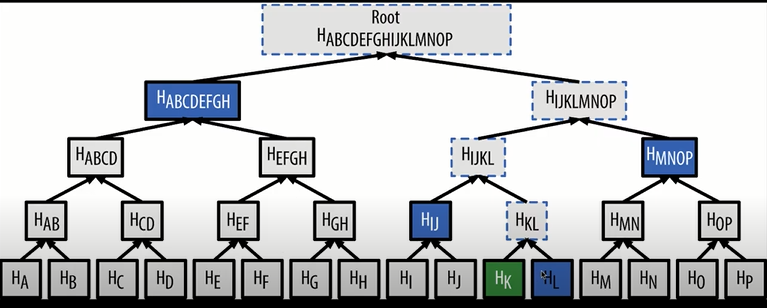